## Topic
- Masking
- Color Scheme
- Gometric Transforms
- Filters
- Contour

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
#read in the image
img = cv2.imread('./images/pizza_blue.jpeg')

In [3]:
print('Image type: ',type(img))

Image type:  <class 'numpy.ndarray'>


In [4]:
print('Image dimension: ',img.shape)

Image dimension:  (168, 300, 3)


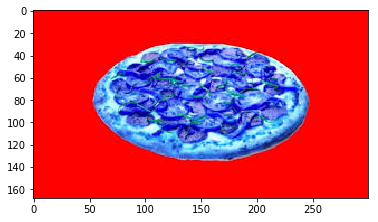

In [5]:
#display the image
plt.imshow(img)

In [6]:
img_copy = np.copy(img)

In [7]:
#by default imge is read as BGR need to convert to RGB for display purpose in openCV
img_copy = cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB)

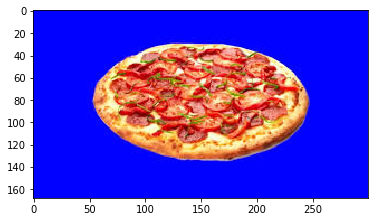

In [8]:
plt.imshow(img_copy)

### Define the color threshold

In [9]:
#Define our color selection in RGB threshold
lower_blue = np.array([0,0,220])
upper_blue = np.array([50,70,255])

### Create a Mask

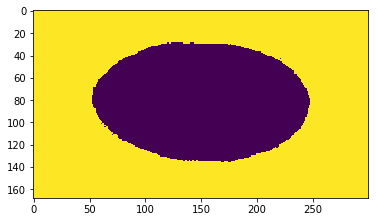

In [10]:
#Define a mask
mask = cv2.inRange(img_copy, lower_blue, upper_blue)
plt.imshow(mask)

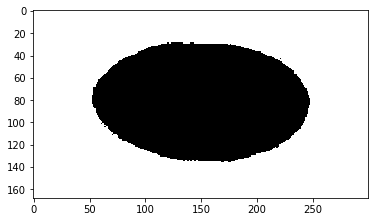

In [11]:
plt.imshow(mask,cmap='gray')

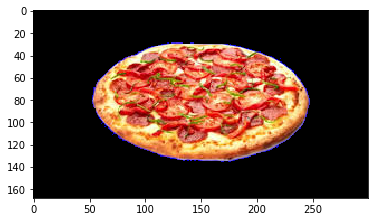

In [12]:
#mask the image to show the pizza through
masked_img = np.copy(img_copy)

#mask the image to only show the masked region by setting the region outside mask to black (0,0,0)
masked_img[mask != 0] = [0,0,0]

plt.imshow(masked_img)

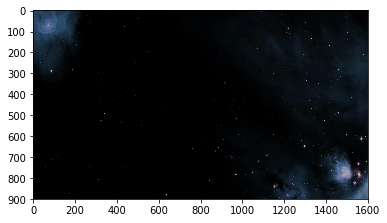

In [13]:
brgnd_img = cv2.imread('./images/space.jpg')
brgnd_img = cv2.cvtColor(brgnd_img, cv2.COLOR_BGR2RGB)

plt.imshow(brgnd_img)

In [14]:
brgnd_img.shape

(900, 1600, 3)

In [15]:
croped_img = brgnd_img[0:168,0:300]

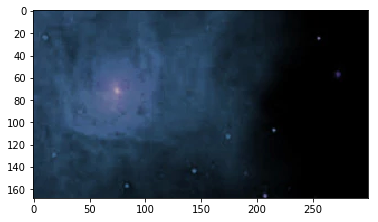

In [16]:
plt.imshow(croped_img)

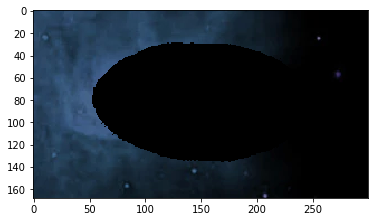

In [17]:
#lets now mask out the pizza area

croped_img[mask == 0] = [0,0,0]
plt.imshow(croped_img)

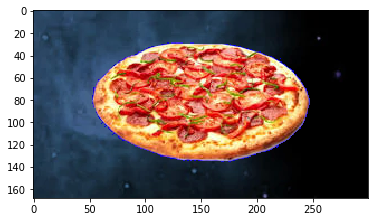

In [18]:
final_img = masked_img + croped_img
plt.imshow(final_img)

## Color Space

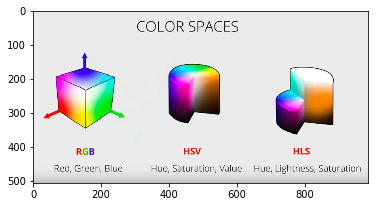

In [19]:
color_space = cv2.imread('./images/color_space.png')
color_space = cv2.cvtColor(color_space,cv2.COLOR_BGR2RGB)
plt.imshow(color_space)

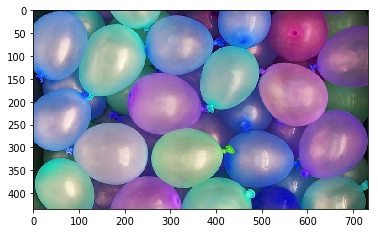

In [21]:
image = cv2.imread('./images/water_balloons.jpg')
image_copy = np.copy(image)
plt.imshow(image_copy)

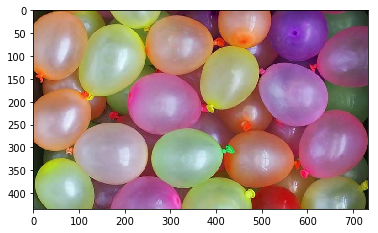

In [22]:
image_copy = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

### Plot color channels

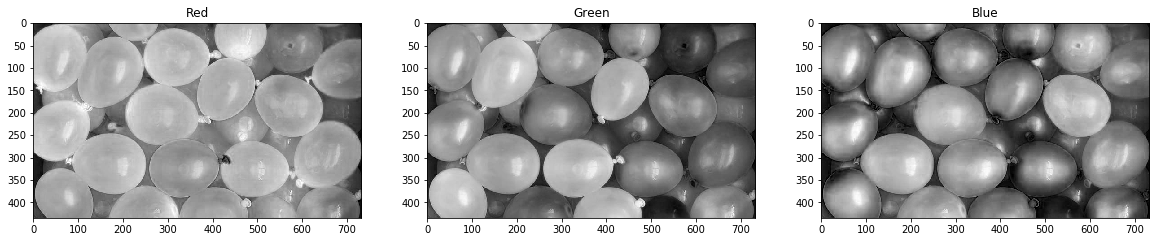

In [24]:
# RGB channels

r = image_copy[:,:,0]
g = image_copy[:,:,1]
b = image_copy[:,:,2]

f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,10))

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')

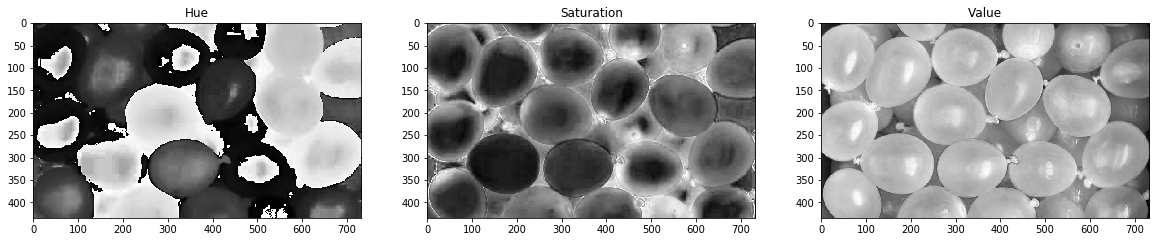

In [26]:
# Convert from RGB to HSV

hsv = cv2.cvtColor(image_copy, cv2.COLOR_RGB2HSV)

h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')

In [27]:
# Define our color selection criteria in RGB value for pink
lower_pink = np.array([180,0,100])
upper_pink = np.array([255,255,230])

## Mask the image

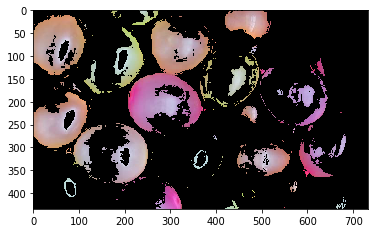

In [31]:
# RGB Mask

# Define the masked area 
mask_rgb = cv2.inRange(image_copy, lower_pink, upper_pink)

# Create a copy and mask the image
masked_image = np.copy(image_copy)
masked_image[mask_rgb == 0] = [0,0,0]

plt.imshow(masked_image)

In [86]:
# Define our color selection criteria in HSV value for pink
lower_hue = np.array([140,50,125])
upper_hue = np.array([160,255,255])

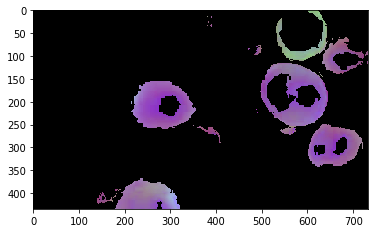

In [87]:
# HSV Mask

# Define the masked area 
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# Create a copy and mask the image
masked_image = np.copy(hsv)
masked_image[mask_hsv == 0] = [0,0,0]

plt.imshow(masked_image)

## Geometric Transform

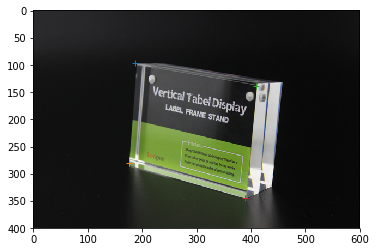

In [100]:
# Transforming Text
card = cv2.imread('./images/display_tag.jpg')
card = cv2.cvtColor(card, cv2.COLOR_BGR2RGB)
plt.imshow(card)

plt.plot(186,96, '+') # Top Left
plt.plot(175,280, '+') # Bottom Left
plt.plot(390,345, '+') # Bottom Right
plt.plot(410,138, '+') # Top Right


### Define the gemometric Transform

In [117]:
def warp(image):

    source_pts = np.float32(
        [[186,96],
         [175,280],
         [390,345],
         [410,138]   
        ]
    )
    
    warped_pts = np.float32(
        [[186,96],
         [186,290],
         [420,290],
         [420,96]   
        ]
    )
    
    transform_matrix = cv2.getPerspectiveTransform(source_pts, warped_pts)
    transform_matrix_inverse = cv2.getPerspectiveTransform(warped_pts, source_pts)
    
    # Get the image size (width, height)
    image_size = (image.shape[1], image.shape[0])
    
    # Compute and return the warped image
    warped = cv2.warpPerspective(image, transform_matrix, image_size, flags=cv2.INTER_LINEAR)
    
    return warped

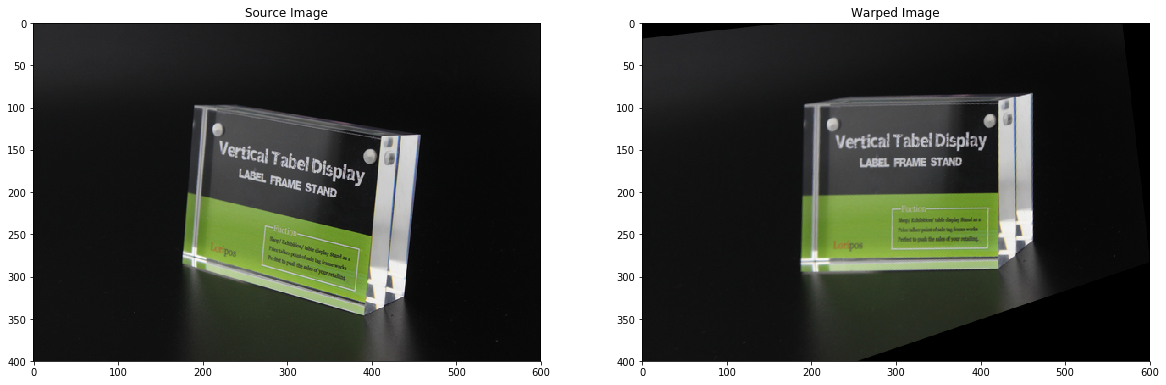

In [118]:
warped_image = warp(card)

# create a subplot 

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.set_title('Source Image')
ax1.imshow(card)
ax2.set_title('Warped Image')
ax2.imshow(warped_image)

### Edge Filters 

- High Pass
- Low Pass

#### Frequency in image 
- rate of change

### Filters
- Filter out unwanted information
- Amplify features of interest

### High Pass Filters
- Sharpen an image
- Enhance high-frequency parts of an image
- Edge detection
- eg: gradients and Sobel filters

In [133]:
# Convolution filter
'''
 0 -1  0
-1  4 -1
 0 -1  0
'''

'\n 0 -1  0\n-1  4 -1\n 0 -1  0\n'

### Low Pass Filters
- Blur/Smooth an image
- Block high-frequency parts of an image
- eg: Gaussian Blur

In [135]:
# Averaging filter
'''
 1 1 1
 1 1 1  x 1/9
 1 1 1
'''
# Gaussian Blur
'''
1 2 1
2 4 2  x 1/16
1 2 1 
'''

'\n1 2 1\n2 4 2  x 1/16\n1 2 1 \n'

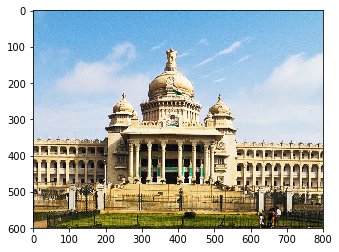

In [120]:
image = cv2.imread('./images/vidhana-soudha.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

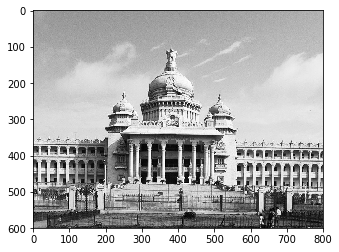

In [122]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray, cmap='gray')

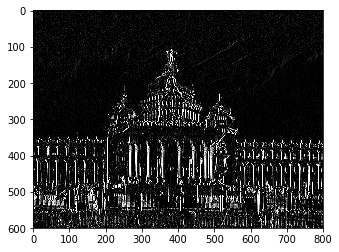

In [124]:
# 3x3 array for horizontal edge detection
# Sobel Filters - gradient change in x or y direction

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

# Perform convoilution using filter2d,which has inputs (grayscale image, bit-depth, kernel(filter))
filtered_image = cv2.filter2D(image_gray,-1,sobel_x)
plt.imshow(filtered_image, cmap='gray')

### Create binary image

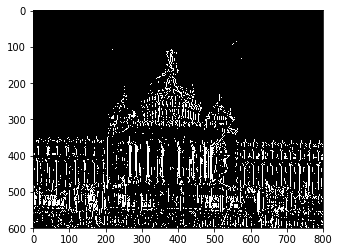

In [136]:
# create threshold that sets all the filtered pixel to white

retval, binary_image = cv2.threshold(filtered_image,75,255,cv2.THRESH_BINARY)
plt.imshow(binary_image, cmap='gray')

## Sobel filter tips

- Magnitude : for a gradient in both x and y directiosn, the magnitude is the square root of the sum of the squares
- Direction : the direction of the gradient is simply the inverse tangent(arctangent) of the y gradient divided by the x gradient

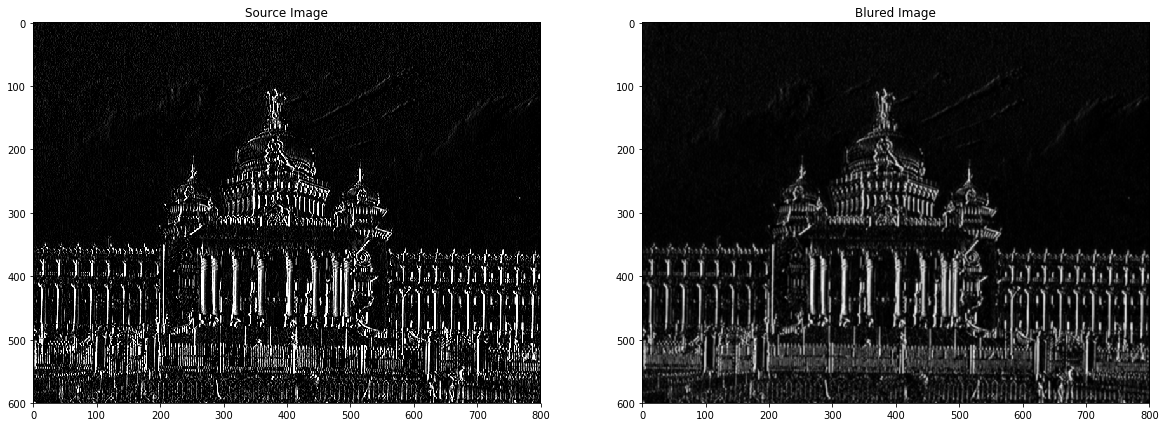

In [140]:
blured_image = cv2.GaussianBlur(filtered_image, (5,5),0)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.set_title('Source Image')
ax1.imshow(filtered_image, cmap='gray')
ax2.set_title('Blured Image')
ax2.imshow(blured_image, cmap='gray')

## Canny Edge Detection

- filters out noise using guassian blur
- finds the strength and direction of edges using sobel filters
- applies non-maximum supression to siolate the strongest edges and thin them to one-pixel wide lines
- uses hysteresis to isolate the best edges

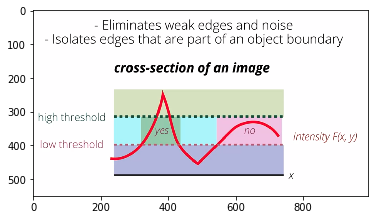

In [141]:
hysteresis = cv2.imread('./images/hysteresis.png')
plt.imshow(hysteresis)

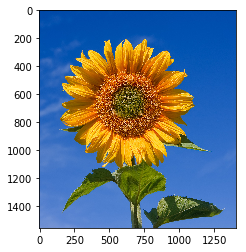

In [142]:
# Canny edge detection example

flower = cv2.imread('./images/sunflower.jpg')
flower = cv2.cvtColor(flower, cv2.COLOR_BGR2RGB)
plt.imshow(flower)

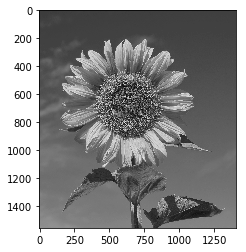

In [144]:
# convert to grayscale
gray = cv2.cvtColor(flower, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')

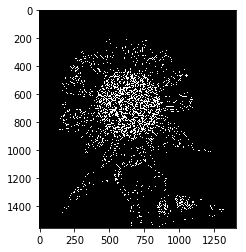

In [145]:
#implement canny edge detection

lower = 120
upper = 240

# the result is an binary image

edges = cv2.Canny(gray, lower, upper)
plt.imshow(edges, cmap='gray')

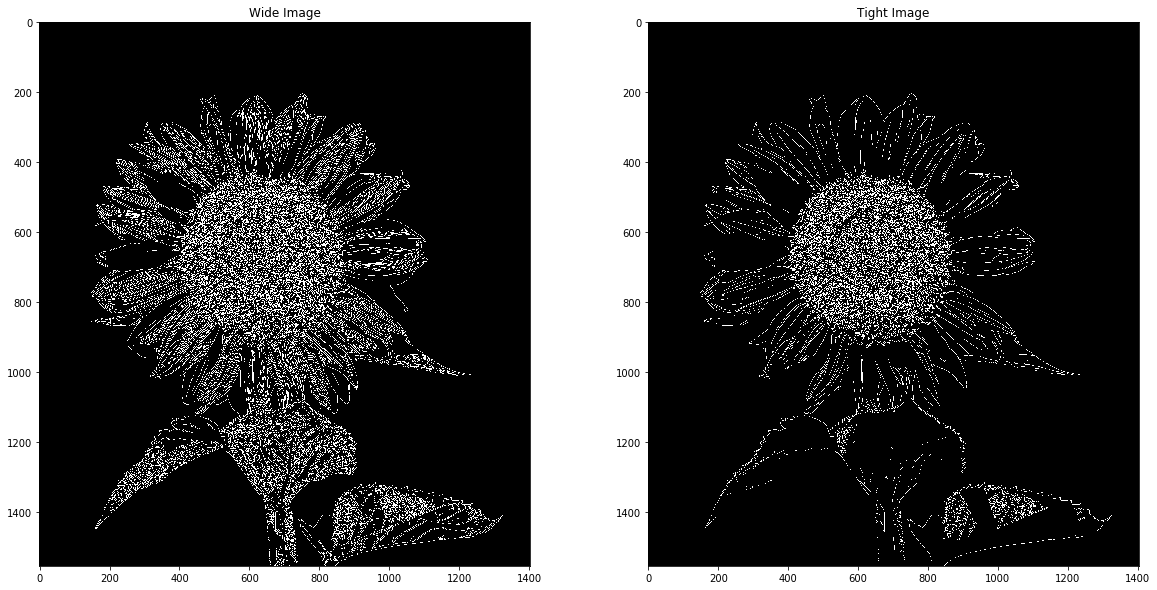

In [147]:
# Try using tight and wide thresholds

wide = cv2.Canny(gray, 30, 100)
tight = cv2.Canny(gray, 200, 240)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.set_title('Wide Image')
ax1.imshow(wide, cmap='gray')
ax2.set_title('Tight Image')
ax2.imshow(tight, cmap='gray')

## Contour

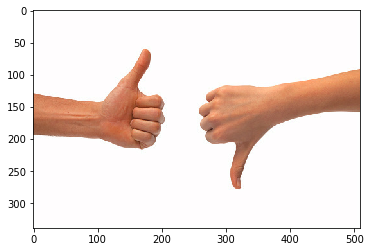

In [4]:
# Read in an image and convert to RGB
image = cv2.imread('./images/thumbs-up-down.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

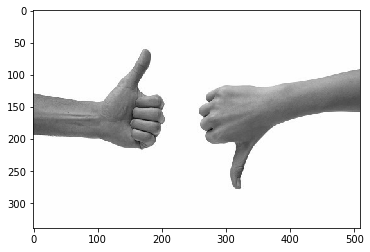

In [5]:
# Convert to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')

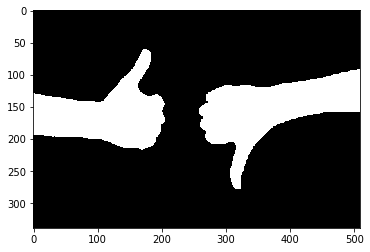

In [6]:
# Create a binary thresholded image
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
plt.imshow(binary,cmap='gray')

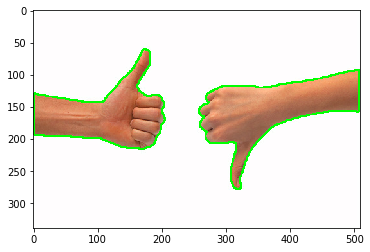

In [7]:
# Find contours from thresholded image
retval, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
contour_image = np.copy(image)
cv2.drawContours(contour_image, contours, -1, (0,255,0), 2)
plt.imshow(contour_image)

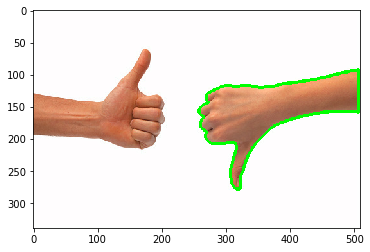

In [9]:
# Select the contour at index= 0 from a list
selected_contour = contours[0]

# Draw the first contour (index = 0)
contour_image_0 = np.copy(image)

contour_image_0 = cv2.drawContours(contour_image_0, [selected_contour], 0,  (0,255,0), 3)
plt.imshow(contour_image_0)

In [ ]:
selected_contour = contours[0]

# Draw the first contour (index = 0)
contour_image_sel = np.copy(image)

contour_image_sel = cv2.drawContours(contour_image_sel, [selected_contour], 0,  (0,255,0), 3)
plt.imshow(contour_image_sel)